In [47]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from functools import reduce
import numpy as np
import math
import random
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
#from sklearn.cluster import MiniBatchKMeans
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.metrics.pairwise import pairwise_distances
from pprint import pprint as pp
plt.rcParams["figure.figsize"] =(12,9)

In [41]:
vertices = [(1, 8), (9, 9), (4, 1)]
polygon = Polygon(vertices)

y = [v[0] for v in vertices]
x = [v[0] for v in vertices]

min_y = reduce(lambda a, b: min(a, b), y)
min_x = reduce(lambda a, b: min(a, b), x)
max_y = reduce(lambda a, b: max(a, b), y)
max_x = reduce(lambda a, b: max(a, b), x)
points_x = []
points_y = []
points = []
while len(points_x) < 200000:
    p = Point([np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y)])
    if polygon.contains(p):
        points_x.append(p.x)
        points_y.append(p.y)
        points.append([p.x, p.y])

In [42]:
X = np.array(points)
kmeans = KMeans(n_clusters=20, random_state=0, max_iter=1000000).fit(X)
#kmeans = MiniBatchKMeans(n_clusters=40, random_state=0, max_iter=90000000, batch_size=50000).fit(X)


/usr/local/lib/python3.5/dist-packages/scipy/spatial/_plotutils.py:20: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()


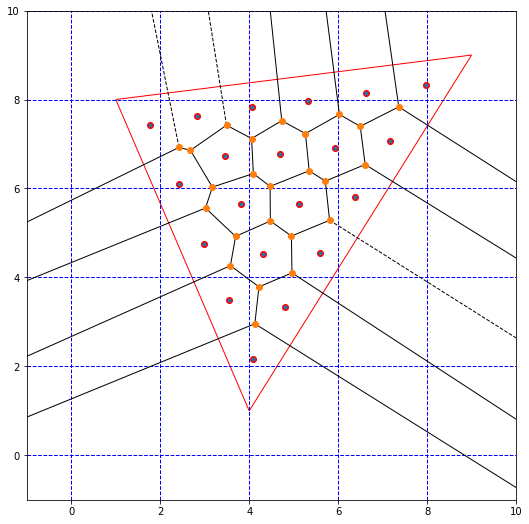

In [43]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
ax.grid(color='b', linestyle='--', linewidth=1)
ax.set_aspect('equal')

line = plt.Polygon(vertices, closed=True, fill=None, edgecolor='r')
ax.add_patch(line)
c_x = [p[0] for p in kmeans.cluster_centers_]
c_y = [p[1] for p in kmeans.cluster_centers_]
plt.plot(c_x, c_y, marker='o', color='r', ls='')

vor = Voronoi(kmeans.cluster_centers_)
voronoi_plot_2d(vor, ax=ax, fig=fig)
ax.set_xlim(-1, 10)
ax.set_ylim(-1, 10)
plt.show()

In [48]:
distances = pairwise_distances(kmeans.cluster_centers_, metric='euclidean')
distances[distances <= 0.1] = 9999
print(np.min(distances))
distances_to_boundaries = []
for cluster in kmeans.cluster_centers_:
    p = Point(cluster[0], cluster[1])
    distances_to_boundaries.append(polygon.exterior.distance(p))
pp(distances_to_boundaries)

1.065573016303783
[1.6660639642928874,
 0.5610291699242347,
 0.5568550294618393,
 0.488799675628377,
 1.6619757843883,
 0.5645810047296128,
 0.5177142390445214,
 0.5658532770202604,
 0.5827546975625741,
 0.5103586944112302,
 0.5337502140147865,
 0.5404971294944276,
 0.523887820326554,
 1.5998687535254097,
 1.5120329417120386,
 0.5370495092915811,
 0.5235986582520243,
 1.5760613309493776,
 0.5519338134729397,
 1.4965607124047968]
